# working with image

In [1]:
#importing libraries 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

#The function imread loads an image from the specified file and returns it
img=cv2.imread("watch.jpg",0)
#IMREAD_COLOR=1,IMREAD_GRAYSCALE=0,IMREAD_UNCHANGED=-1

cv2.imshow("watch",img)
cv2.waitKey(0)    #wait for any key to be pressed
cv2.destroyAllWindows()  #for destroying all opened windows by clicking close 



In [2]:
#writing image into disk
cv2.imwrite("watch_gray.jpg",img)

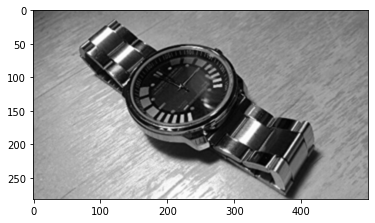

In [4]:
#showing image using matplotlib
plt.imshow(img,cmap='gray',interpolation='bicubic')
plt.show()

# Working on video

In [21]:
#importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# "Frame" will get the next frame in the camera (via "cap").
# "Ret" will obtain return value from getting the camera frame, either true of false

cap=cv2.VideoCapture(0) #using webcam
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out=cv2.VideoWriter('output.avi',fourcc, 20.0,(640,480)) #writing video

while True:
    ret,frame=cap.read()  #video info stored in frame
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    out.write(frame)
    
    #showing video
    cv2.imshow("frame",frame)
    cv2.imshow("GRAY",gray)
    
    #for closing loop and video window
    if cv2.waitKey(1) & 0xFF == ord('q'):      #waitKey(0): for image , waitKey(1) : for video 
        break;

cap.release()
out.release()
cv2.destroyAllWindows()

## Reading Video from Memory

In [5]:
#reading video from memory
import numpy as np
import cv2

cap = cv2.VideoCapture('apex.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

## Drawing on Image

In [49]:
#drawing on image 
import numpy as np
import cv2
img=cv2.imread("watch.jpg",1)
                                               #B   G    R
cv2.line(img=img,pt1=(220,220),pt2=(100,200),color=(0,0,0),thickness=8)

cv2.rectangle(img=img,pt1=(0,0),pt2=(150,200),color=(255,0,0),thickness=-1)
                                                                    # in shift point(x,y)-->new_point(x*2^-shift,y*2^-shift)
cv2.circle(img=img,center=(150,200),radius=50,color=(0,0,255),thickness=20,shift=1)  #for circle and reactangle if we use 
                                                                                    # thickness as -1 it fills the inner part 

#for any other polygon figure including triangle etc
pts=np.array([[0,0],[0,200],[200,200]],np.int32)
cv2.polylines(img=img,pts=[pts],isClosed=True,color=(0,255,0),thickness=0)

#writing on image and same for video
fonts=cv2.FONT_HERSHEY_COMPLEX_SMALL
cv2.putText(img=img,text='Watch !',org=(0,250),fontFace=fonts,fontScale=2,color=(255,255,255),thickness=2)
    
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Drawing and Writing on Video

In [52]:
#drawing and writing  on video
import numpy as np
import cv2

cap = cv2.VideoCapture('apex.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        cv2.rectangle(img=frame,pt1=(0,0),pt2=(150,200),color=(255,0,0),thickness=6)
        
        fonts=cv2.FONT_HERSHEY_COMPLEX_SMALL
        cv2.putText(img=frame,text='Apex',org=(250,250),fontFace=fonts,fontScale=2,color=(255,0,0),thickness=2)
        
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

## Image Operations

In [65]:
#image operations 

import numpy as np
import cv2

img=cv2.imread("watch.jpg",1)

px=img[100,100]
print(px) #color of pixel 100:100

#region of image 
roi=img[200:282,150:230]

img[100:200,100:150]=[255,255,255] #changing pixels color

img[0:82,0:80]=roi


cv2.imshow('watch',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[ 21  84 135]


## Arithmetic and Logical Operations

In [1]:
#arithmetic and logical operations
import numpy as np
import cv2

img1=cv2.imread('3DMatplotlib.png',1)
img2=cv2.imread('mat.png',1)
img3=cv2.imread('pythonlogo.png',1)

#add=img1+img2

add=cv2.add(img1,img2) #adds the pixel values  // if alpha and beta is equals to 1 then cv2.addWeighted is same as cv2.add

weighted=cv2.addWeighted(src1=img1,alpha=0.6,src2=img2,beta=0.4,gamma=0)#same size and array dst=src1*alpha + src2*beta + gamma;

rows,cols,channel=img3.shape
roi=img1[0:rows,0:cols]   #gets the reigon of image of img1 with the size of img3
cv2.imshow('roi',roi)
# img3gray=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY) #converts color to gray
# ret,mask=cv2.threshold(src=img3gray,thresh=220,maxval=255,type=cv2.THRESH_BINARY_INV) #as the black and a color is near 0 so 
#                                                                             #if any value is less than 220 it become 0 else 255
#                                                                             #then the black and white gets inversed

# mask_inv=cv2.bitwise_not(mask) # gets the inverse of mask

# img1_bg=cv2.bitwise_and(roi,roi,mask=mask_inv) # put mask_inv on roi of img1
# img3_fg=cv2.bitwise_and(img3,img3,mask=mask)#creates colored area of original image with black/transparent background i think so

# dst=cv2.add(img1_bg,img3_fg) #add both image making only colored area visible
# img_new=img1
# img_new[0:rows,0:cols]=dst


# #cv2.imshow('add',add)
# #cv2.imshow('weighted',weighted)
# cv2.imshow('img3gray',img3gray)
# cv2.imshow('mask',mask)
# cv2.imshow('mask_inv',mask_inv)
# cv2.imshow('img1_bg',img1_bg)
# cv2.imshow('img3_fg',img3_fg)
# cv2.imshow('img_new',img_new) #python logo on matplotlib image



cv2.waitKey(0)
cv2.destroyAllWindows()

## Threshold

In [4]:
#thresholding 

import numpy as np
import cv2

img=cv2.imread('bookpage.jpg')


# threshold on the original image 
retval,threshold=cv2.threshold(src=img,thresh=12,maxval=225,type=cv2.THRESH_BINARY)


# converting image to gray
grayscaled=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval2,threshold2=cv2.threshold(src=grayscaled,thresh=12,maxval=225,type=cv2.THRESH_BINARY)

gaus=cv2.adaptiveThreshold(grayscaled,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
retval3,otsu=cv2.threshold(src=grayscaled,thresh=12,maxval=225,type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow('og',img)
cv2.imshow('book page gray',grayscaled)
cv2.imshow('book page',threshold2)
cv2.imshow('gaus',gaus)
cv2.imshow('otsu',otsu)
cv2.imshow('threshold1',threshold)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Threshold Thoery

### Threshold

Here, the matter is straight forward. 
If pixel value is greater than a threshold value, it is assigned one value (may be white), 
else it is assigned another value (may be black). The function used is cv2.threshold

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']


-> cv2.THRESH_BINARY

-> cv2.THRESH_BINARY_INV

-> cv2.THRESH_TRUNC

-> cv2.THRESH_TOZERO

-> cv2.THRESH_TOZERO_INV


### Adaptive Threshold

In the previous section, we used a global value as threshold value. 
But it may not be good in all the conditions where image has different lighting conditions in different areas.
In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. 
So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.


Adaptive Method - It decides how thresholding value is calculated.

-> cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
    
-> cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
    
Block Size - It decides the size of neighbourhood area.

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

In [3]:
#thresholds examples
import numpy as np
import cv2

img=cv2.imread('threshold.jpg')
img2=cv2.imread('adaptive_threshold.jpg')

cv2.imshow('thresh',img)
cv2.imshow('adap_thresh',img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Color Filtering and Blurs

In [4]:
# Color Filtering 

import cv2
import numpy as np

cap=cv2.VideoCapture(0)

while(True):
    _,frame = cap.read()
    #hsv : hue saturation value
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # filtering
    lower = np.array([0, 10, 60], dtype = "uint8") #for skin color
    upper = np.array([20, 150, 255], dtype = "uint8")
    
    mask = cv2.inRange(hsv, lower, upper)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Blurring and smoothing
    kernel = np.ones((15,15), np.float32)/225
    smoothed = cv2.filter2D(res,-1,kernel)
    
    blur = cv2.GaussianBlur(res, (15,15), 0)
    
    median = cv2.medianBlur(res, 15)
    
    bilateral = cv2.bilateralFilter(res,15,75,75)
    
    
    
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
    cv2.imshow('frame',frame)
#     cv2.imshow('mask',mask)

    cv2.imshow('result',res)
    cv2.imshow('smooth',smoothed)
    cv2.imshow('blur',blur)
    cv2.imshow('median',median)
    cv2.imshow('bilateral',bilateral)

cv2.destroyAllWindows()
cap.release()
    

## Morphological Transformation
### Thoery

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation.

#### 1. Erosion

The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). So the thickness or size of the foreground object decreases or simply white region decreases in the image. Detach the connected object

#### 2. Dilation

It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.



In [10]:
# Morphological Transformation
import cv2
import numpy as np

#link for reference
link='https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html'

cap=cv2.VideoCapture(0)

while(True):
    _,frame = cap.read()
    #hsv : hue saturation value
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower = np.array([0, 10, 60], dtype = "uint8") #for skin color
    upper = np.array([20, 150, 255], dtype = "uint8")
    
    mask = cv2.inRange(hsv, lower, upper)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    kernel = np.ones((5,5), np.uint8)
    
    """ 1. Erosion
        2. Dilation
    """
    erosion = cv2.erode(mask,kernel,iterations=1)
    dilation = cv2.dilate(mask,kernel,iterations=1)
    
    """3. Opening is just another name of erosion followed by dilation. 
    It is useful in removing noise, as we explained above. 
    Here we use the function"""
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    """4. Closing is reverse of Opening, Dilation followed by Erosion. 
    It is useful in closing small holes inside the foreground 
    objects,or small black points on the object."""
    
    """
        5. Gradient :- It is the difference between dilation and erosion of an image.
                        The result will look like the outline of the object.
                    
        6. Top Hat :- It is the difference between input image and Opening of the image.
        
        7. Black Hat :- It is the difference between the closing of the input image and input image.
    """
    gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
    tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)
    blackhat = cv2.morphologyEx(mask, cv2.MORPH_BLACKHAT, kernel)


    
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('result',res)
    
#     cv2.imshow('erosion',erosion)
#     cv2.imshow('dilation',dilation)
    
#     cv2.imshow('closing',closing)
#     cv2.imshow('opening',opening)
    
    cv2.imshow('gradient',gradient)
    cv2.imshow('tophat',tophat)
    cv2.imshow('blackhat',blackhat)

    
cv2.destroyAllWindows()
cap.release()

## Edge Detection and Gradients

In [8]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    _,frame = cap.read()
                                    # CV_64F doesnot work
    laplacian = cv2.Laplacian(frame,cv2.CV_8U)
    sobelx = cv2.Sobel(src=frame,ddepth=cv2.CV_8U,dx=1,dy=0,ksize=5)
    sobely = cv2.Sobel(src=frame,ddepth=cv2.CV_8U,dx=0,dy=1,ksize=5)
    
    # edge detector
    edges = cv2.Canny(frame,100,200)
    
    cv2.imshow('og',frame)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)
    cv2.imshow('edges',edges)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

## Template Matching

In [9]:
import cv2
import numpy as np

img_big_bgr = cv2.imread('template_big.jpg')
img_big_gray = cv2.cvtColor(img_big_bgr,cv2.COLOR_BGR2GRAY)
template = cv2.imread('template_small.jpg',0)

w, h = template.shape[::-1]
print(w,h)

res = cv2.matchTemplate(img_big_gray,template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)



for pt in zip(*loc[::-1]):
    print(pt)
    cv2.rectangle(img=img_big_bgr,pt1=pt,pt2=(pt[0]+w,pt[1]+h),color=(255,255,255),thickness=1)
    
cv2.imshow('detected',img_big_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

19 22
(545, 101)
(546, 101)
(545, 102)
(546, 102)
(547, 102)
(545, 103)
(546, 103)
(543, 151)
(544, 151)
(545, 151)
(543, 152)
(544, 152)
(545, 152)
(543, 153)
(544, 153)
(545, 153)
(541, 199)
(540, 200)
(541, 200)
(540, 201)
(541, 201)
(538, 246)


## GrabCut Foreground Extraction

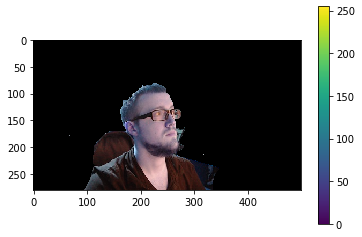

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sentdex.jpg')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,79,300,500) # change this according to image only 

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)| (mask==0), 0, 1).astype('uint8')
img = img*mask2[:, :,np.newaxis] # np.newaxis increases the dimension

plt.imshow(img)
plt.colorbar()
plt.show()

## Corner Detection

In [5]:
import cv2
import numpy as np

img = cv2.imread('corner_example.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(image=gray,maxCorners=100,qualityLevel=0.01,minDistance=10)

print(corners)
corners = np.int0(corners) # remove float or decimal 
print(corners)

for corner in corners:
    x, y = corner.ravel() # The ravel() function is used to create a contiguous flattened array.
                          # A 1-D array, containing the elements of the input, is returned.
    cv2.circle(img,(x,y),3,255,-1)
    
cv2.imshow('corners',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[[112. 153.]]

 [[ 77. 191.]]

 [[568. 223.]]

 [[516. 233.]]

 [[127. 298.]]

 [[ 78. 180.]]

 [[112. 142.]]

 [[534. 258.]]

 [[188. 254.]]

 [[533. 223.]]

 [[528. 245.]]

 [[507. 242.]]

 [[584. 253.]]

 [[584. 242.]]

 [[115. 299.]]

 [[106. 312.]]

 [[573. 211.]]

 [[460. 225.]]

 [[573. 253.]]

 [[573. 242.]]

 [[460. 237.]]

 [[119. 282.]]

 [[447. 211.]]

 [[447. 253.]]

 [[458. 252.]]

 [[117. 262.]]

 [[458. 212.]]

 [[475. 212.]]

 [[473. 225.]]

 [[473. 238.]]

 [[486. 212.]]

 [[475. 252.]]

 [[584. 212.]]

 [[486. 252.]]

 [[544. 223.]]

 [[ 56.  63.]]

 [[176. 395.]]

 [[233. 328.]]

 [[ 93. 392.]]

 [[ 49. 350.]]

 [[251. 204.]]

 [[164.  60.]]

 [[551. 241.]]

 [[ 17. 254.]]

 [[ 53. 134.]]

 [[558. 223.]]

 [[277. 207.]]

 [[277. 403.]]

 [[400. 403.]]

 [[400. 207.]]

 [[509. 145.]]

 [[509.  30.]]

 [[375. 145.]]

 [[375.  30.]]

 [[115. 272.]]

 [[140. 184.]]

 [[152.  98.]]

 [[150. 109.]]

 [[518. 244.]]

 [[104. 236.]]

 [[146. 152.]]

 [[126. 221.]]

 [[155. 

## Feature Matching

Feature matching is going to be a slightly more impressive version of template matching, where a perfect, or very close to perfect, match is required.

We start with the image that we're hoping to find, and then we can search for this image within another image. The beauty here is that the image does not need to be the same lighting, angle, rotation...etc. The features just need to match up.

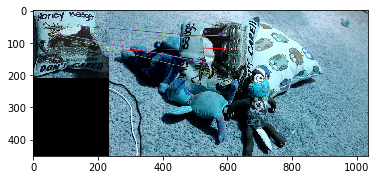

In [17]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('opencv-feature-matching-image.jpg',0)
template=cv2.imread('opencv-feature-matching-template.jpg',0)

#color image and black&white image shows same results

orb = cv2.ORB_create()

#keypoint , descriptor
kp1, des1 = orb.detectAndCompute(template,None)
kp2, des2 = orb.detectAndCompute(img,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x :x.distance )

img3 = cv2.drawMatches(template,kp1,img,kp2,matches[:10],None,flags=2)


plt.imshow(img3)
plt.show()


## MOG Background Reduction

displays the objects that are in motion only 

In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
fgbg= cv2.createBackgroundSubtractorMOG2()

while(cap.isOpened()):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    if ret==True:
        cv2.imshow('frame',frame)
        cv2.imshow('fgmask',fgmask)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

## HaarCascade

In [ ]:
# Using already present haar cascade for face and eyes detection
import cv2
import numpy as np
haar_cascade_dir='.\\haarcascades\\'

face_cascade = cv2.CascadeClassifier(haar_cascade_dir + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(haar_cascade_dir + 'haarcascade_eye.xml')

cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    
        
    if ret==True:
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

## Clicking image using Webcam

In [23]:
# clicking image using webcam
import numpy as np
import cv2


cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    cv2.imshow("test", frame)
    if not ret:
        break
    k = cv2.waitKey(1)

    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
    elif k%256 == ord('s'):
        print('S pressed')

cam.release()

cv2.destroyAllWindows()

S pressed
opencv_frame_0.png written!
opencv_frame_1.png written!
Escape hit, closing...


# hand gesture recognition

In [13]:
#importing libraries
import numpy as np
import cv2
import os


def display_info(arg):
    button={
    0:"     ",
    1:'palm_'+str(palm_counter),
    2:'ok_'+str(ok_counter),
    3:'peace_'+str(peace_counter),
    4:'punch_'+str(punch_counter),
    5:'thumb_'+str(thumb_counter),
    6:'right_'+str(right_counter)
    }
    return button.get(arg)

text_to_be_shown='palm_'+str(palm_counter)+'\n'+'ok_'+str(ok_counter)+'peace_'+str(peace_counter)+'punch_'+str(punch_counter)+'thumb_'+str(thumb_counter)+'right_'+str(right_counter)

#paths for training folder
path_train='C:\\Users\\nigam\\OneDrive\\Desktop\\work\\Projects Online\\open-cv tutorial\\image_train\\'
path_test='C:\\Users\\nigam\\OneDrive\\Desktop\\work\\Projects Online\\open-cv tutorial\\image_train\\'
path_palm = path_train+'palm\\'
path_ok = path_train+'ok\\'
path_peace = path_train+'peace\\'
path_punch = path_train+'punch\\'
path_thumb = path_train+'thumbs_up\\'
path_right = path_train+'right\\'

#image numbers counters in directory
palm_counter=0
ok_counter=0
peace_counter=0
punch_counter=0
thumb_counter=0
right_counter=0

#number of images present in directory
for files in os.listdir(path_palm):
    palm_counter=palm_counter+1
    
for files in os.listdir(path_ok):
    ok_counter=ok_counter+1
    
for files in os.listdir(path_peace):
    peace_counter=peace_counter+1
    
for files in os.listdir(path_punch):
    punch_counter=punch_counter+1
    
for files in os.listdir(path_thumb):
    thumb_counter=thumb_counter+1
    
for files in os.listdir(path_right):
    right_counter=right_counter+1




cam=cv2.VideoCapture(0)
#cv2.namedWindow('WebCam')
#directory=""
button_pressed=0



upper_left=(0,100)
bottom_right=(250,350)
while True:
    ret,frame=cam.read()
    cv2.rectangle(img=frame,pt1=upper_left,pt2=bottom_right,color=(255,0,0),thickness=1)
    
    
    show_text=display_info(button_pressed)
    
    fonts=cv2.FONT_HERSHEY_COMPLEX_SMALL
    cv2.putText(img=frame,text=show_text,org=(10,370),fontFace=fonts,fontScale=1,color=(255,0,0),thickness=1)
    
    cv2.imshow('Webcam',frame)
    roi=frame[upper_left[1]:bottom_right[1],upper_left[0]:bottom_right[0]]
    cv2.imshow('roi',roi)
    
    #roi_gray=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY) #converts color to gray
    #ret2,mask=cv2.threshold(src=roi_gray,thresh=220,maxval=255,type=cv2.THRESH_BINARY_INV)
    
    #mask_inv=cv2.bitwise_not(mask)
    
   
    
    #cv2.imshow('mask_roi',mask_inv)
    if not ret:
        break
    
    k=cv2.waitKey(1)
    if k%256 ==27:
        print('Exiting the setup....')
        break
    elif k%256 ==ord('1'):
        cv2.imwrite(path_palm+'palm_{}.png'.format( palm_counter),roi)
        palm_counter=palm_counter+1
        print("written in disk-palm")
        button_pressed=1
    elif k%256 ==ord('2'):
        cv2.imwrite(path_ok+'ok_{}.png'.format( ok_counter),roi)
        ok_counter=ok_counter+1
        print("written in disk-ok")
        button_pressed=2
    elif k%256 ==ord('3'):
        cv2.imwrite(path_peace+'peace_{}.png'.format( peace_counter),roi)
        peace_counter=peace_counter+1
        print("written in disk-peace")
        button_pressed=3
    elif k%256 ==ord('4'):
        cv2.imwrite(path_punch+'punch_{}.png'.format( punch_counter),roi)
        punch_counter=punch_counter+1
        print("written in disk-punch")
        button_pressed=4
    elif k%256 ==ord('5'):
        cv2.imwrite(path_thumb+'thumb_{}.png'.format( thumb_counter),roi)
        thumb_counter=thumb_counter+1
        print("written in disk-thumb")
        button_pressed=5
    elif k%256 ==ord('6'):
        cv2.imwrite(path_right+'right_{}.png'.format( right_counter),roi)
        right_counter=right_counter+1
        print("written in disk-right")
        button_pressed=6

cam.release()
cv2.destroyAllWindows()

written in disk-palm
written in disk-ok
written in disk-peace
written in disk-peace
Exiting the setup....


In [1]:
import os
import numpy as np
import cv2

path_palm = 'C:\\Users\\nigam\\OneDrive\\Desktop\\work\\Projects Online\\open-cv tutorial\\images_train\\ok\\'

cam=cv2.VideoCapture(0)
#cv2.namedWindow('WebCam')
#directory=""


upper_left=(0,100)
bottom_right=(250,350)
while True:
    ret,frame=cam.read()
    cv2.rectangle(img=frame,pt1=upper_left,pt2=bottom_right,color=(255,0,0),thickness=1)
    cv2.imshow('Webcam',frame)
    roi=frame[upper_left[1]:bottom_right[1],upper_left[0]:bottom_right[0]]
    cv2.imshow('roi',roi)
    roi_gray=cv2.cvtColor(src=roi,code=cv2.COLOR_BGR2GRAY)


    retval,threshold=cv2.threshold(src=roi_gray,thresh=150,maxval=225,type=cv2.THRESH_BINARY)

    cv2.imshow('thresh',threshold)
    k=cv2.waitKey(1)
    
    if not ret:
        break
    
    if k%256==27:
        break


cam.release()
cv2.destroyAllWindows()

In [5]:
import os
import numpy as np
import cv2

path = 'C:\\Users\\nigam\\OneDrive\\Desktop\\work\\Projects Online\\open-cv tutorial\\image_train\\ok\\'
img=cv2.imread(os.path.join(path ,"ok_0.png" ),0)

retval,threshold=cv2.threshold(src=img,thresh=118,maxval=225,type=cv2.THRESH_BINARY_INV)
retval3,otsu=cv2.threshold(src=img,thresh=12,maxval=225,type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
gaus=cv2.adaptiveThreshold(threshold,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)

cv2.imshow('img',img)
cv2.imshow('thresh',threshold)
cv2.imshow('otsu',otsu)
cv2.imshow('gaus',gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#color filtering 
import cv2
import numpy



cap=cv2.VideoCapture(0)

while True:
    _,frame=cap.read()
    #hsv hue saturation value
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    hsv1=preprocess(frame)
    
    lower_red=np.array([150,0,0])
    upper_red=np.array([200,255,255])
    
    lower = np.array([0, 10, 60], dtype = "uint8") #for skin color
    upper = np.array([20, 150, 255], dtype = "uint8")
    
    mask=cv2.inRange(hsv,lower,upper)
    res=cv2.bitwise_and(frame,frame,mask=mask)
    
    kernel=np.ones((15,15),np.float32)/225
    smooth=cv2.filter2D(res,-1,kernel)
    
    blur=cv2.GaussianBlur(res,(15,15),0)
    median=cv2.medianBlur(res,15)
    
    bilateral=cv2.bilateralFilter(res,15,75,75)
    
    k=cv2.waitKey(1)
    if k%256 ==27:
        print('Exiting the setup....')
        break
        
    #cv2.imshow('mask',mask)
    #cv2.imshow('res',res)
    #cv2.imshow('smooth',smooth)
    #cv2.imshow('blur',blur)
    #cv2.imshow('median',median)
    cv2.imshow('bilateral',bilateral)
    
cv2.destroyAllWindows()
cap.release()

In [ ]:
#function for skin color
def preprocess(action_frame):

    blur = cv2.GaussianBlur(action_frame, (3,3), 0)
    hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)

    lower_color = np.array([108, 23, 82])
    upper_color = np.array([179, 255, 255])

    mask = cv2.inRange(hsv, lower_color, upper_color)
    blur = cv2.medianBlur(mask, 5)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
    hsv_d = cv2.dilate(blur, kernel)
    return hsv_d

In [27]:
import os
import numpy as np
import cv2

path = 'C:\\Users\\nigam\\OneDrive\\Desktop\\work\\Projects Online\\open-cv tutorial\\image_train\\punch\\'
img=cv2.imread(os.path.join(path ,"punch_1.png" ))

lower = np.array([0, 10, 60], dtype = "uint8") #for skin color
upper = np.array([20, 150, 255], dtype = "uint8")

hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)    
mask=cv2.inRange(hsv,lower,upper)
res=cv2.bitwise_and(img,img,mask=mask)

cv2.imshow('img',img)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
cv2.imshow('hsv',hsv)

cv2.waitKey(0)
cv2.destroyAllWindows()